<a href="https://colab.research.google.com/github/Shyam657/EDA/blob/main/electricity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d michaelbryantds/electricity-data-for-200-geographies

  0% 0.00/2.21M [00:00<?, ?B/s]
100% 2.21M/2.21M [00:00<00:00, 94.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('electricity-data-for-200-geographies.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [20]:
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd 
import numpy as np 

In [ ]:
df2=pd.read_csv('/content/files/yearly_full_release_long_format.csv')

In [ ]:
df=df2.copy()

In [ ]:
df.head(2)

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN


In [ ]:
df.columns

Index(['Area', 'Country code', 'Year', 'Area type', 'Continent',
       'Ember region', 'EU', 'OECD', 'G20', 'G7', 'Category', 'Subcategory',
       'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change'],
      dtype='object')

In [ ]:
df.isnull().sum()

Area                        0
Country code            15972
Year                        0
Area type                   0
Continent               15972
Ember region            15972
EU                      15972
OECD                    15972
G20                     15972
G7                      15972
Category                    0
Subcategory                 0
Variable                    0
Unit                        0
Value                   20775
YoY absolute change    103793
YoY % change           183768
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323530 entries, 0 to 323529
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Area                 323530 non-null  object 
 1   Country code         307558 non-null  object 
 2   Year                 323530 non-null  int64  
 3   Area type            323530 non-null  object 
 4   Continent            307558 non-null  object 
 5   Ember region         307558 non-null  object 
 6   EU                   307558 non-null  float64
 7   OECD                 307558 non-null  float64
 8   G20                  307558 non-null  float64
 9   G7                   307558 non-null  float64
 10  Category             323530 non-null  object 
 11  Subcategory          323530 non-null  object 
 12  Variable             323530 non-null  object 
 13  Unit                 323530 non-null  object 
 14  Value                302755 non-null  float64
 15  YoY absolute chan

In [ ]:
df.nunique()

Area                     226
Country code             215
Year                      22
Area type                  2
Continent                  6
Ember region               7
EU                         2
OECD                       2
G20                        2
G7                         2
Category                   5
Subcategory                7
Variable                  21
Unit                       6
Value                  23154
YoY absolute change     8337
YoY % change            9596
dtype: int64

In [ ]:
loc=list(df['Area'].unique())
loc

In [ ]:
df['Area'].unique()

In [ ]:
df.head()

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN
2,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN,NaN
3,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN,NaN
4,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Renewables,GW,0.19,NaN,NaN


In [ ]:
#Clean Area column
df.Area = df.Area.str.replace('the', '').replace(r'["()"]', '', regex=True).replace('Nerlands','Netherlands')

## Data Columns Sunburst Diagram

In [25]:
fig2 = px.sunburst(df, path  = ['Category','Subcategory','Variable','Unit'], 
                       color = 'Category', 
                       width = 800, height=800,)


fig2.update_layout(title_text = "Data Columns Sunburst Diagram",
                   title_x    = 0.5,
                   font_size  = 20, 
                   font_family= 'monospace',
                   margin     = dict(t=80, l=25, r=25, b=25) )
fig2.show(renderer="colab")

In [117]:
#df.head(5)

In [27]:
df['Category'].value_counts()

Electricity generation    151867
Power sector emissions     83357
Capacity                   73459
Electricity demand          9898
Electricity imports         4949
Name: Category, dtype: int64

In [26]:
df['Subcategory'].value_counts()

Fuel                   175060
Aggregate fuel         118776
Total                    9898
Demand                   4949
Demand per capita        4949
Electricity imports      4949
CO2 intensity            4949
Name: Subcategory, dtype: int64

#Let Us Check How much electricity imports along different

In [116]:
df_sun = df[(df['Subcategory'] == 'Demand per capita')]
df_sun = df_sun.dropna(how='any')
#df_sun


In [ ]:
fig2   = px.sunburst(df_sun, path  = ['Continent','Area','Year','Subcategory'], 
                    values ='Value',
                    color  ='Continent',
                    width  = 800, 
                    height = 800)

fig2.update_layout(title_text ="Demand Sunburst Diagram",
                   title_x    =0.5,
                   font_size  =20, 
                   font_family='monospace',
                   margin     = dict(t=80, l=25, r=25, b=25) )
fig2.show(renderer='colab')

In [118]:
''' The CO2 emission intensity (g CO2/kWh) is calculated as the ratio of CO2 emissions from public electricity 
    production (as a share of CO2 emissions from public electricity and heat production related to electricity production), 
    and gross electricity production.'''

df_nuc_y = df[df['Variable'] == 'CO2 intensity']
fig = px.choropleth(df_nuc_y,
                    locations              = 'Area', 
                    locationmode           = "country names",                    
                    color                  = 'Value',
                    color_continuous_scale = 'ylorbr',                                   
                    projection             = 'azimuthal equidistant',
                    animation_frame        = "Year",
                    scope                  = 'world',
                    width                  = 1024, 
                    height                 = 768) 

fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=-0.2, xanchor="left", x=0.2))
fig.show(renderer='colab')

In [119]:
#df.head(5)

In [41]:
#lets focus on G20 countires

In [45]:
df['G20'].value_counts()

0.0    280498
1.0     27060
Name: G20, dtype: int64

In [56]:

df_G7 = df[df['G7'] == 1]

In [57]:
df_G7.head()

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
50402,Canada,CAN,2000,Country,North America,North America,0.0,1.0,1.0,1.0,Capacity,Aggregate fuel,Clean,GW,79.30,NaN,NaN
50403,Canada,CAN,2000,Country,North America,North America,0.0,1.0,1.0,1.0,Capacity,Aggregate fuel,Fossil,GW,31.76,NaN,NaN
50404,Canada,CAN,2000,Country,North America,North America,0.0,1.0,1.0,1.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,13.45,NaN,NaN
50405,Canada,CAN,2000,Country,North America,North America,0.0,1.0,1.0,1.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,68.59,NaN,NaN
50406,Canada,CAN,2000,Country,North America,North America,0.0,1.0,1.0,1.0,Capacity,Aggregate fuel,Renewables,GW,68.69,NaN,NaN


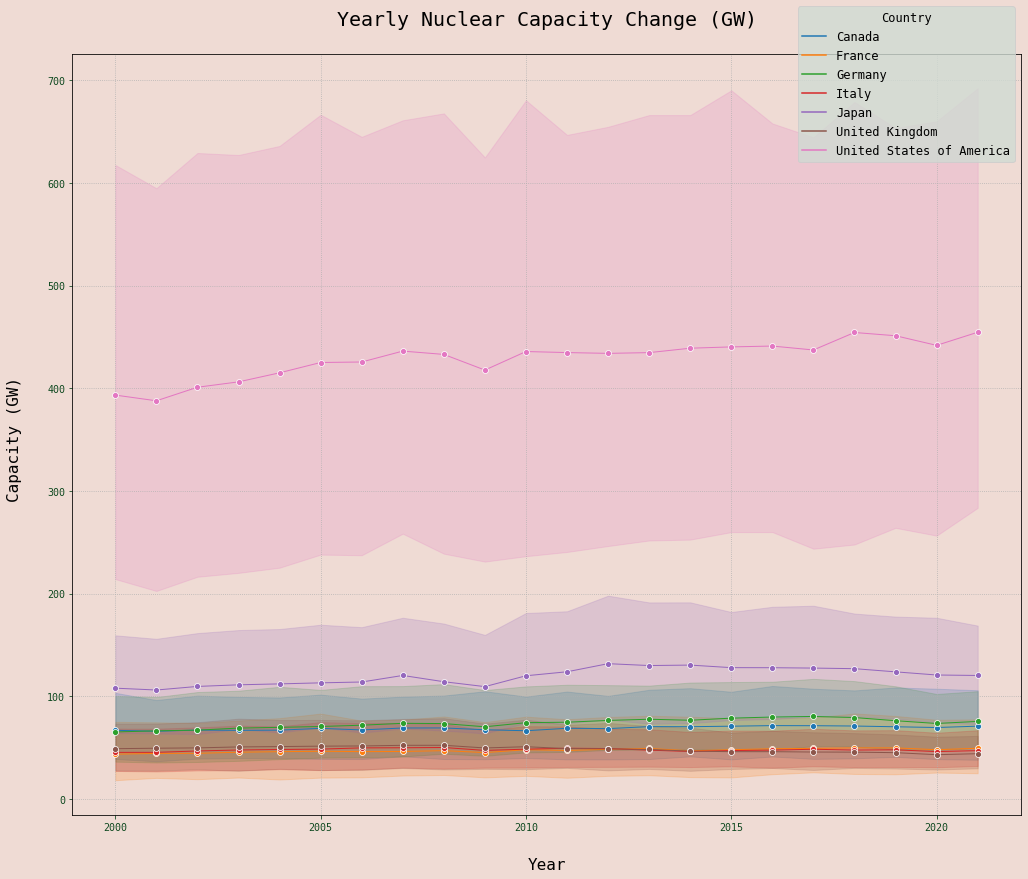

In [58]:
fig , ax = plt.subplots(figsize=(17,14))
#sns.despine(offset=10)
ax   = sns.lineplot(data=df_G7, x='Year', y='Value', hue='Area',marker='o', linewidth = 1, palette='tab10')

sns.set_style({ 'axes.facecolor':'#efdbd4', 'figure.facecolor':'#efdbd4', 'axes.grid': True, 
               "ytick.color":'#0f4920', "xtick.color":'#0f4920',"grid.linestyle": ":",
               'font.family':'monospace','font.monospace' :'Times New Roman' })

plt.title("Yearly Nuclear Capacity Change (GW)", size=20, y=1.03)
plt.ylabel("Capacity (GW) ", size=16 ,labelpad=25)
plt.xlabel("Year", size=16, labelpad=25)
ax.legend(fontsize = 12, bbox_to_anchor= (1, 1.07), title="Country", title_fontsize = 12, \
          shadow = False, facecolor = '#d0dbd3')

In [120]:
#df.head()

In [60]:
sns.reset_defaults()

In [62]:
df['Ember region'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania',
       'Latin America and Caribbean', 'Middle East', 'North America'],
      dtype=object)

In [81]:

df_Asia = df[(df['Ember region'] == 'Asia')]

In [121]:
#df_Asia

In [83]:
df_import = df_Asia[(df_Asia['Variable'] == 'Net Imports') & (df_Asia['Year'] == 2021)]
df_import = df_import.sort_values(by='Value' , ascending=False )

In [122]:
#df_import

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

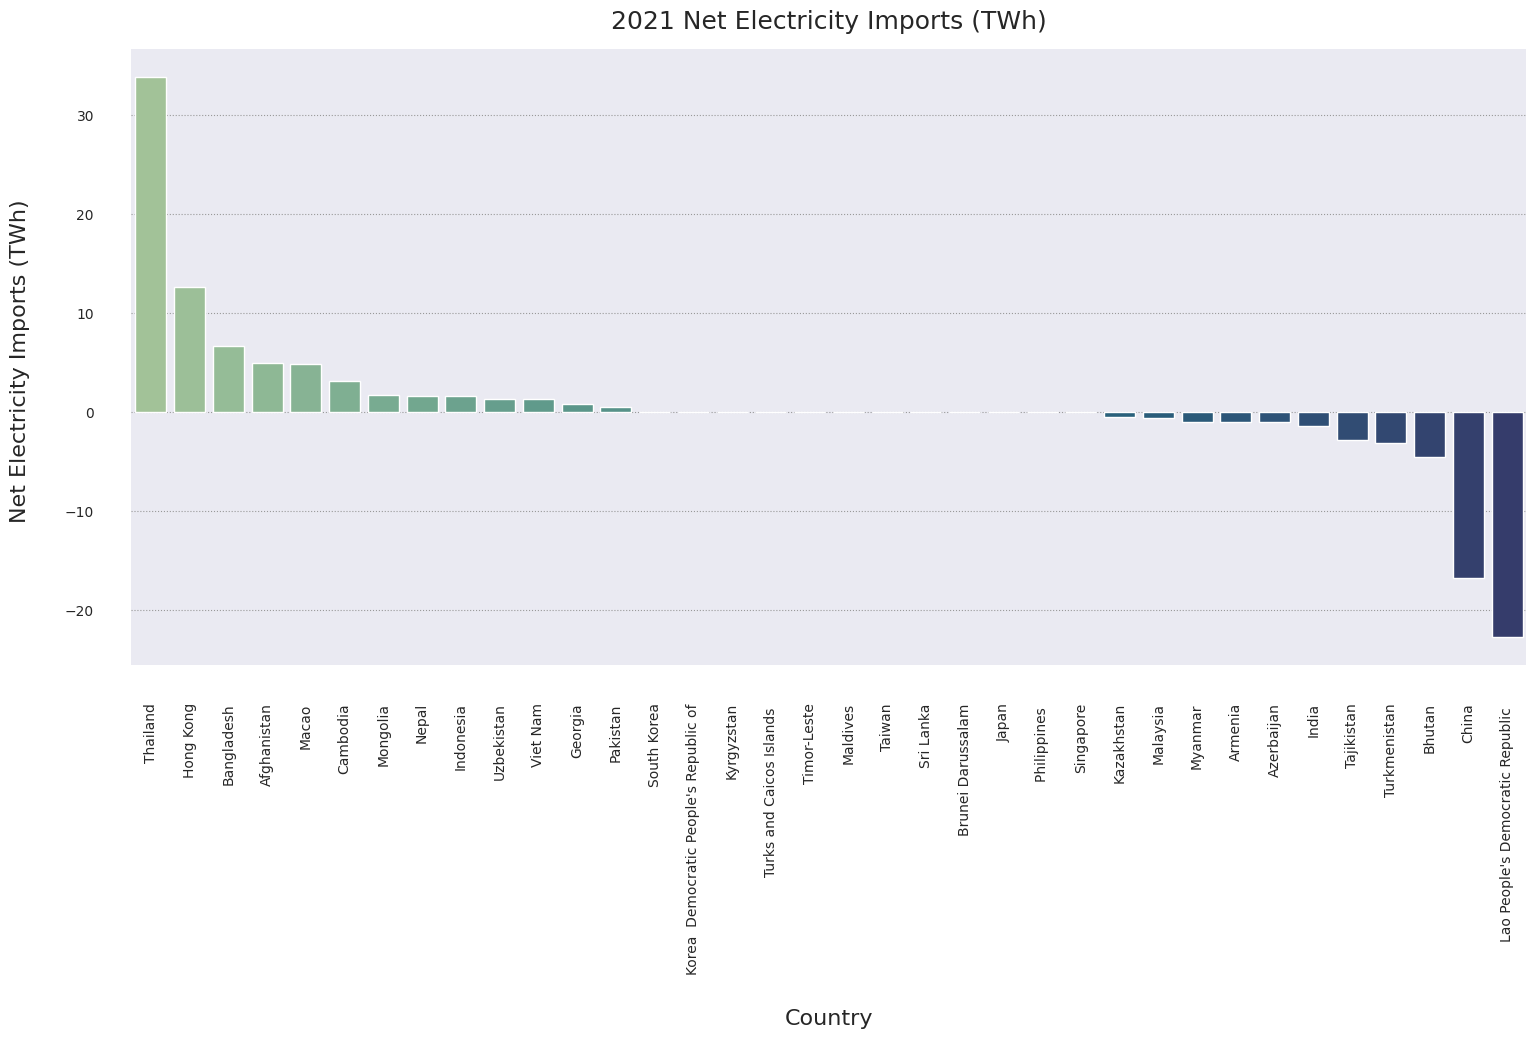

In [94]:
fig , ax =plt.subplots(figsize=(18,8))

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.despine(offset=20)


ax   = sns.barplot(data=df_import, y='Value', x='Area', palette=("crest") )

plt.title("2021 Net Electricity Imports (TWh)", size=18, y=1.02)
plt.ylabel("Net Electricity Imports (TWh) ", size=16 ,labelpad=25 )
plt.xlabel("Country", size=16, labelpad=25)
plt.xticks(rotation=90)


In [123]:
#df.head()

In [125]:
#df['YoY absolute change'].value_counts().unique()

In [106]:

df_n = df_Asia[(df_Asia['Category']=='Electricity generation') & (df_Asia['Year']== 2021) & (df_Asia['Subcategory'] == 'Fuel') & (df_Asia['Unit'] == '%')][['Area','Variable','Value']]





In [108]:
df_n = df_n.pivot_table('Value', ['Area'], 'Variable')


In [126]:
#df_n

In [113]:
df_n = df_n[['Coal', 'Hydro','Nuclear','Wind','Bioenergy','Solar','Other Fossil','Other Renewables','Gas' ]]
df_n.sort_values(by='Coal',  axis = 0, ascending = True, inplace = True,) # Sorted by 'Hydro' 

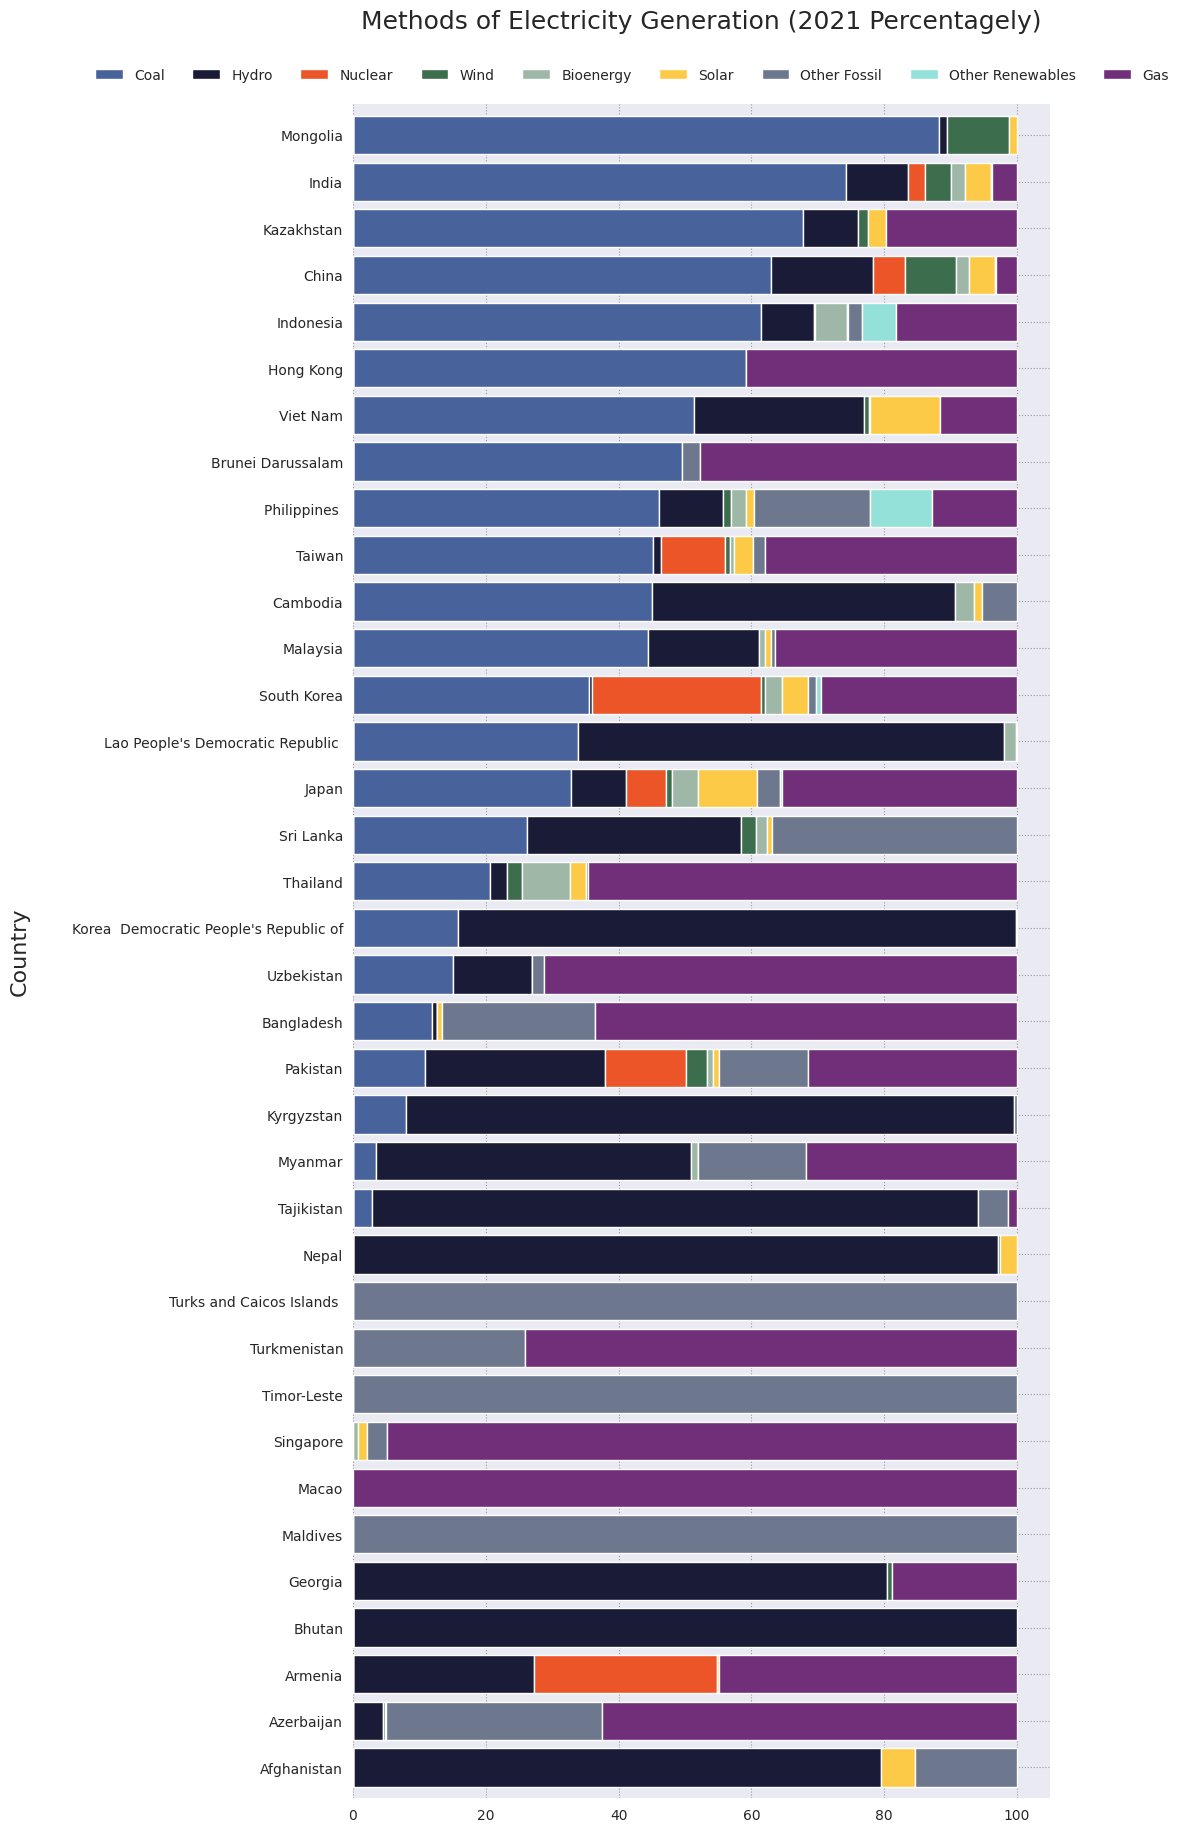

In [114]:
clrs = ['#48639C','#1A1B36','#ec5528','#3c6d4d','#9fb7a7','#FCCA46','#6D778D','#93E1D8','#712F79' ]
ax   = df_n.plot(kind= 'barh', stacked  = True, color=clrs, figsize  = (9, 22), width=.82)
plt.title("Methods of Electricity Generation (2021 Percentagely)", size=18, y=1.04)
plt.ylabel("Country", size=16 ,labelpad=30)
sns.despine(left=True, bottom=True)
plt.legend( bbox_to_anchor = (0.4, 1.01), loc = "lower center", 
            borderaxespad  = 0, frameon= False, ncol = 9)

  
plt.show()

#key findings: 
1. Nepal does not run with coal
2. Turks and Caicos Island, Maldives and Timor-Leste run on complete Bioenergy.